In [1]:
import pandas as pd
import numpy as np

In [2]:
app_data= pd.read_csv('google play store.csv')

In [3]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
app_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
app_data.select_dtypes('object').describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [8]:
app_data.shape

(10841, 13)

In [9]:
app_data.dropna(inplace=True)

In [10]:
app_data.shape

(9360, 13)

In [11]:
app_data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [12]:
type(app_data['Size'])

pandas.core.series.Series

In [13]:
def trans_size(x):
    if 'M' in x:
        return float(x.replace('M',''))*1000
    elif 'k' in x:
        return float(x.replace('k',''))*1
    else:
        return np.nan
    

In [14]:
app_data['Size'] = app_data['Size'].apply(lambda x: trans_size(x))

In [15]:
app_data['Size'].head(20)

0     19000.0
1     14000.0
2      8700.0
3     25000.0
4      2800.0
5      5600.0
6     19000.0
7     29000.0
8     33000.0
9      3100.0
10    28000.0
11    12000.0
12    20000.0
13    21000.0
14    37000.0
16     5500.0
17    17000.0
18    39000.0
19    31000.0
20    14000.0
Name: Size, dtype: float64

In [16]:
app_data['Installs'] = app_data['Installs'].apply(lambda r: int(r.replace('+', '').replace(',', '')))

In [17]:
app_data['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [18]:
app_data['Price'] = app_data['Price'].apply(lambda y: float(y.replace('$', '')))

In [19]:
app_data['Price'].loc[10460:10480]

10460    1.0
10461    0.0
10462    0.0
10463    0.0
10464    0.0
10465    0.0
10466    0.0
10467    0.0
10468    0.0
10469    0.0
10470    0.0
10471    0.0
10473    0.0
10474    0.0
10475    0.0
10476    0.0
10477    0.0
10478    0.0
10479    0.0
10480    0.0
Name: Price, dtype: float64

In [20]:
app_data = app_data.drop(app_data[(app_data['Rating']<1) & (app_data['Rating']>5)].index)

In [21]:
app_data.shape

(9360, 13)

In [22]:
app_data['Reviews'] = app_data['Reviews'].astype(int)

In [23]:
app_data = app_data.drop(app_data[(app_data['Reviews'] > app_data['Installs'])].index)

In [24]:
app_data.shape

(9353, 13)

In [25]:
app_data = app_data.drop(app_data[(app_data['Type']=='Free') & (app_data['Price'] > 0)].index)

In [26]:
app_data.shape

(9353, 13)

<AxesSubplot:>

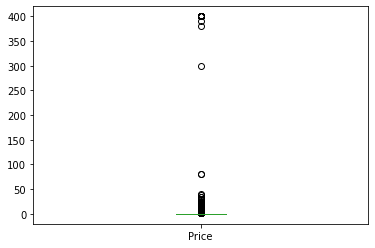

In [27]:
app_data['Price'].plot.box()

<AxesSubplot:>

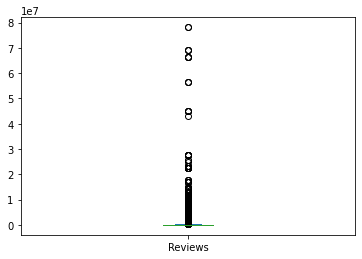

In [28]:
app_data['Reviews'].plot.box()

<AxesSubplot:ylabel='Frequency'>

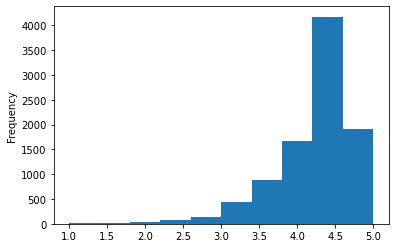

In [29]:
app_data['Rating'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

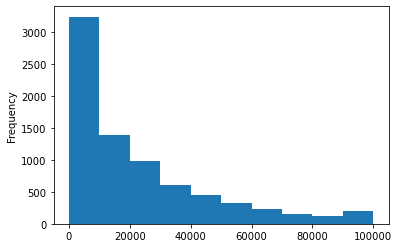

In [30]:
app_data['Size'].plot.hist()

In [31]:
app_data = app_data.drop(app_data[app_data['Price'] > 200].index)

In [32]:
app_data.shape

(9338, 13)

In [33]:
app_data = app_data.drop(app_data[app_data['Reviews'] > 2000000].index)

In [34]:
app_data.shape

(8885, 13)

In [35]:
np.percentile(app_data['Installs'],[10,25,50,70,90,95,99])

array([1.e+03, 1.e+04, 5.e+05, 1.e+06, 1.e+07, 1.e+07, 1.e+08])

In [36]:
np.percentile(app_data['Installs'],25)

10000.0

In [37]:
app_data['Installs'].quantile([.1,.25,.5,.7,.9,.95,.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [38]:
app_data = app_data.drop(app_data[app_data['Installs']>10000000].index)

In [39]:
app_data.shape

(8496, 13)

In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

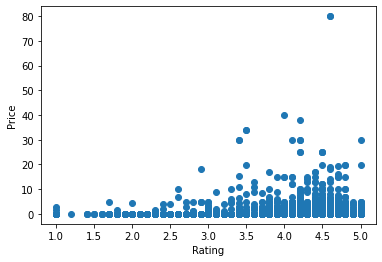

In [41]:
plt.scatter(app_data['Rating'], app_data['Price'])
plt.xlabel ('Rating')
plt.ylabel ('Price')

Text(0, 0.5, 'Size')

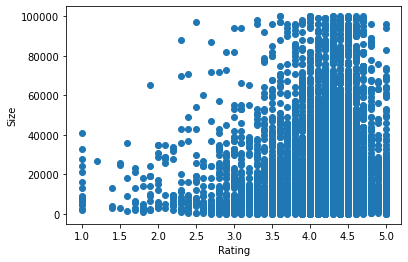

In [42]:
plt.scatter(app_data['Rating'], app_data['Size'])
plt.xlabel ('Rating')
plt.ylabel ('Size')

Text(0, 0.5, 'Reviews')

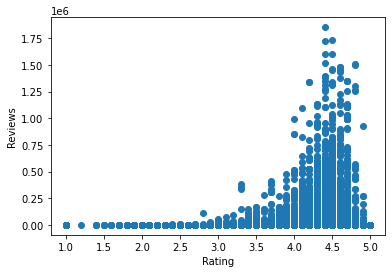

In [43]:
plt.scatter(app_data['Rating'], app_data['Reviews'])
plt.xlabel ('Rating')
plt.ylabel ('Reviews')

In [44]:
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

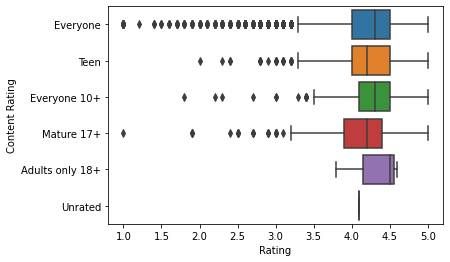

In [45]:
sns.boxplot(x=app_data['Rating'], y=app_data['Content Rating'])


<AxesSubplot:xlabel='Rating', ylabel='Category'>

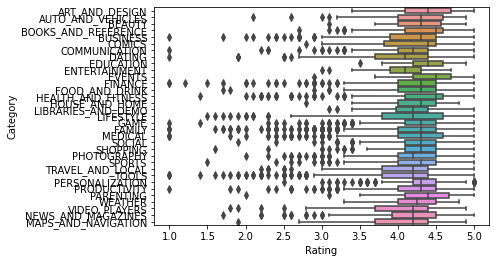

In [46]:
sns.boxplot(x=app_data['Rating'], y=app_data['Category'])



In [47]:
inp1 = app_data

In [48]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


In [49]:
inp1.skew()

C:\Users\212633161\AppData\Local\Temp\ipykernel_1120\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.533259
Installs     1.543697
Price       16.264811
dtype: float64

In [50]:
reviewskew = np.log(inp1['Reviews']+1)

In [51]:
reviewskew.skew()

-0.20039949659264134

In [52]:
inp1['Reviews'] =reviewskew

In [53]:
inp1['Reviews']. head()

0     5.075174
1     6.875232
2    11.379520
4     6.875232
5     5.123964
Name: Reviews, dtype: float64

In [54]:
installsskew = np.log(inp1['Installs']+1)

In [55]:
installsskew.skew()

-0.5097286542754812

In [56]:
inp1['Installs'] = installsskew

In [57]:
inp1['Installs'].head()

0     9.210440
1    13.122365
2    15.424949
4    11.512935
5    10.819798
Name: Installs, dtype: float64

In [58]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


In [59]:
inp1 = inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver", "Type"], axis =1)

In [60]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [61]:
inp2 = inp1
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design


In [62]:
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [63]:
inp2.Category = pd.Categorical(inp2.Category)

In [64]:
x= inp2['Category']

In [65]:
del inp2['Category']

In [66]:
dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2, dummies],axis =1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]     

In [68]:
lists

['Racing;Action & Adventure',
 'Puzzle;Brain Games',
 'Casual;Action & Adventure',
 'Action;Action & Adventure',
 'Educational;Pretend Play',
 'Board;Brain Games',
 'Music',
 'Casual;Brain Games',
 'Arcade;Action & Adventure',
 'Simulation;Action & Adventure',
 'Entertainment;Brain Games',
 'Education;Creativity',
 'Art & Design;Creativity',
 'Casual;Creativity',
 'Role Playing;Action & Adventure',
 'Parenting;Music & Video',
 'Education;Action & Adventure',
 'Educational;Brain Games',
 'Education;Music & Video',
 'Educational;Creativity',
 'Role Playing;Pretend Play',
 'Sports;Action & Adventure',
 'Simulation;Pretend Play',
 'Adventure;Action & Adventure',
 'Education;Brain Games',
 'Parenting;Education',
 'Video Players & Editors;Music & Video',
 'Casual;Education',
 'Music;Music & Video',
 'Entertainment;Creativity',
 'Simulation;Education',
 'Board;Action & Adventure',
 'Entertainment;Action & Adventure',
 'Puzzle;Action & Adventure',
 'Books & Reference;Education',
 'Art & Design

In [69]:
inp2['Genres'].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [70]:
inp2.Genres=pd.Categorical(inp2['Genres'])

In [71]:
y= inp2['Genres']
del inp2['Genres']
dummies = pd.get_dummies(y, prefix= 'Genres')
inp2 = pd.concat([inp2, dummies], axis=1)

In [72]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
inp2.shape

(8496, 91)

In [74]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [75]:
inp2['Content Rating']=pd.Categorical(inp2['Content Rating'])

In [76]:
z= inp2['Content Rating']
del inp2['Content Rating']
dummies = pd.get_dummies(z, prefix= 'Content Rating')
inp2 = pd.concat([inp2, dummies], axis=1)

In [77]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
inp2.shape

(8496, 96)

In [95]:
inp2.isnull().sum()

Rating                            0
Reviews                           0
Size                           1189
Installs                          0
Price                             0
                               ... 
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
Length: 96, dtype: int64

In [97]:
inp2=inp2.dropna()

In [98]:
inp2.shape

(7307, 96)

In [99]:
from sklearn.model_selection import train_test_split as tts
df1=inp2
X= df1.drop ('Rating', axis =1)
y= df1['Rating']


In [100]:
train_X,test_X, train_y, test_y = tts(X, y, test_size = 0.3)

In [101]:
X.shape, y.shape

((7307, 95), (7307,))

In [102]:
train_X.shape, test_X.shape

((5114, 95), (2193, 95))

In [103]:
from sklearn.linear_model import LinearRegression 

In [105]:
lr = LinearRegression()

In [106]:
lr.fit(train_X, train_y)

LinearRegression()

In [107]:
lr.predict(test_X)

array([4.11728101, 3.83974102, 4.08660537, ..., 4.38955509, 3.73799796,
       4.10846764])

In [108]:
test_y.values

array([4.3, 4.2, 3.6, ..., 4.6, 4.2, 4.5])

In [109]:
lr.score(test_X, test_y)

0.12008572970971332

In [110]:
lr.score(train_X, train_y)

0.156070250915613